# **Final Project - Group 3**
## **"Self-Driving Car"**
Implementing end to end learning for self-driving cars using simulator based on Nvidia Paper

In [1]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzip data from drive

!unzip drive/MyDrive/Classroom/Brainster/TEST.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/IMG/right_2021_07_28_21_48_26_356.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_443.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_519.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_615.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_690.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_782.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_863.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_26_941.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_036.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_110.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_188.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_286.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_368.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_443.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_543.jpg  
  inflating: data/IMG/right_2021_07_28_21_48_27_633.jpg  
  inflating: data/IMG

# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import os
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import random
from sklearn.utils import shuffle
import tensorflow as tf
from random import shuffle
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import core, convolutional, pooling
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers, backend

# **Dataset loading, reading and preprocessing**

### Dataset load

In [4]:
#Dataset read

dataset = pd.read_csv('data/driving_log.csv', names= ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])
print(dataset['center'][1])

C:\Users\User\Desktop\TEST\IMG\center_2021_07_28_21_45_21_196.jpg


In [5]:
dataset.head()

center  ...         speed
0  C:\Users\User\Desktop\TEST\IMG\center_2021_07_...  ...  1.900000e-05
1  C:\Users\User\Desktop\TEST\IMG\center_2021_07_...  ...  8.920000e-06
2  C:\Users\User\Desktop\TEST\IMG\center_2021_07_...  ...  7.520000e-06
3  C:\Users\User\Desktop\TEST\IMG\center_2021_07_...  ...  4.510000e-07
4  C:\Users\User\Desktop\TEST\IMG\center_2021_07_...  ...  4.570000e-06

[5 rows x 7 columns]

In [6]:
#Extracting the image name path

copy_dataset = dataset.copy()

copy_dataset['center'] = copy_dataset['center'].apply(lambda x : x.split('\\')[6])
copy_dataset['left'] = copy_dataset['left'].apply(lambda x : x.split('\\')[6])
copy_dataset['right'] = copy_dataset['right'].apply(lambda x : x.split('\\')[6])

## Dataset read

In [7]:
#Definition of read_image function

def read_image(path_):
  """
  Reads image path and returns image in RGB format
  """
  final_path = os.path.join("data/IMG", path_)
  picture = cv.imread(final_path)
  picture_rgb = cv.cvtColor(picture, cv.COLOR_BGR2RGB)
  return picture_rgb

#Define inputs(image) and targets(angle) datasets and implementing read_image function

inputs = []
targets = []
for c1, c2, c3, angle in zip(copy_dataset['center'], copy_dataset['left'], copy_dataset['right'], copy_dataset['steering']):
   inputs.append(c1)
   targets.append(angle)
   inputs.append(c2)
   targets.append(angle+0.2)
   inputs.append(c3)
   targets.append(angle-0.2)

print(len(inputs))
print(len(targets))

21609
21609


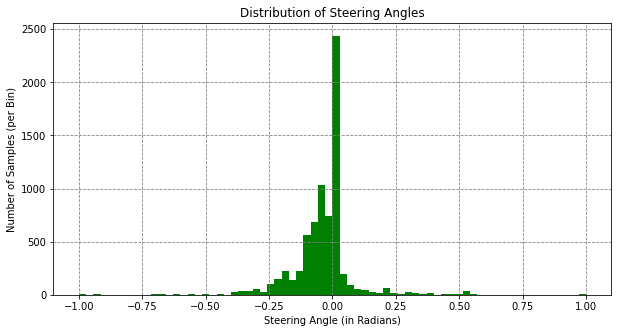

In [8]:
# Basic plotting of the dataset:
plt.figure(figsize = (10, 5))
plt.hist(dataset['steering'], bins = 70, color = 'green')
plt.grid(color = 'grey', linestyle = '--')
plt.title('Distribution of Steering Angles')
plt.xlabel('Steering Angle (in Radians)')
plt.ylabel('Number of Samples (per Bin)')
plt.show()

## Checking the distribution of the target after fliping (changing the sign of the angle)

In [9]:
targets_copy = targets.copy()

for i in range(len(targets_copy)):
  i  = targets_copy[i] *-1
  targets_copy.append(i)
print(targets_copy)

[0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, -0.007518797, 0.19248120300000002, -0.207518797, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0.2, -0.2, 0.0, 0

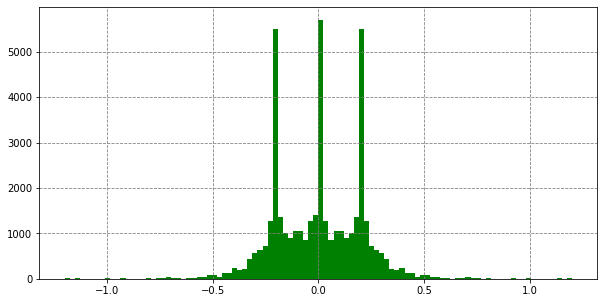

In [10]:
plt.figure(figsize = (10, 5))
plt.hist(targets_copy, bins = 100, color = 'green')
plt.grid(color = 'grey', linestyle = '--')
plt.show()

## Split Dataset

Training Samples: 17287
Test Samples: 4322


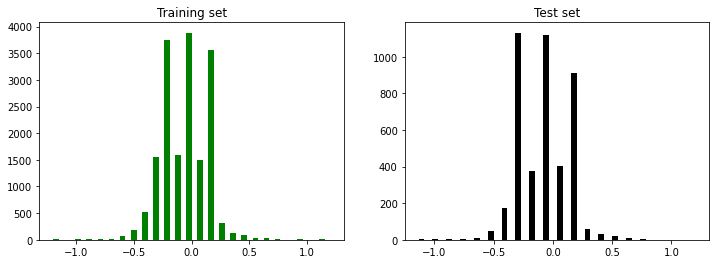

In [11]:
#Dataset split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.20, random_state = 1)

# Check that data is valid
print("Training Samples: {}\nTest Samples: {}".format(len(X_train), len(X_test)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=25, width=0.05, color='green')
axes[0].set_title('Training set')
axes[1].hist(y_test, bins=20, width=0.05, color='black')
axes[1].set_title('Test set');

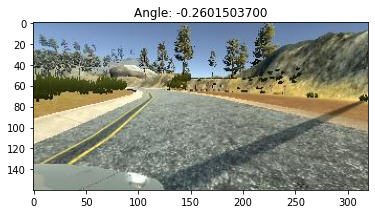

In [12]:
plt.imshow(read_image(X_train[350]))
plt.title('Angle: {0:.10f}'.format(y_train[350]))
plt.show()

## Dataset preprocessing

In [13]:
#Definition of crop function

def crop(img):
    """
    Crop the image (removing the sky and visible part of the car in the image)
    """
    new_slika = img.copy()
    cropped = new_slika[50:-20, :, :]

    return cropped

In [14]:
#YUV color transformation function

def yuv_color(image):
  """ 
  Change to YUV image
  """
  yuv_image = cv.cvtColor(image, cv.COLOR_RGB2YUV)

  return yuv_image

In [15]:
#Normalize data 

def normalize(image):
  """
  Normalization of the image pixel values
  """
  image = image.astype(np.float32)
  image = image/255.0
  
  return image

In [16]:
def preproced_image(image):
  image = read_image(image)
  image = crop(image)
  image = yuv_color(image)

  return image

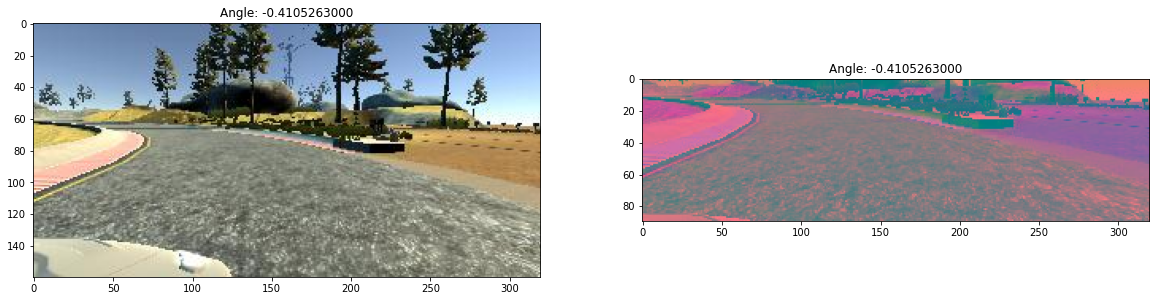

In [17]:
#Comparison of the original and the preprocessed image

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
plt.imshow(preproced_image(X_train[20]))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
plt.show(block=True)

# **Defining Image Augmentation Functions**



In [18]:
#Image flip function

def flip_image(img, steering_angle):
    """
    Flip the image and adjust the steering angle.
    """
    flip_img = cv.flip(img, 1)
    steering_angle = steering_angle * (-1)
    
    return flip_img, steering_angle

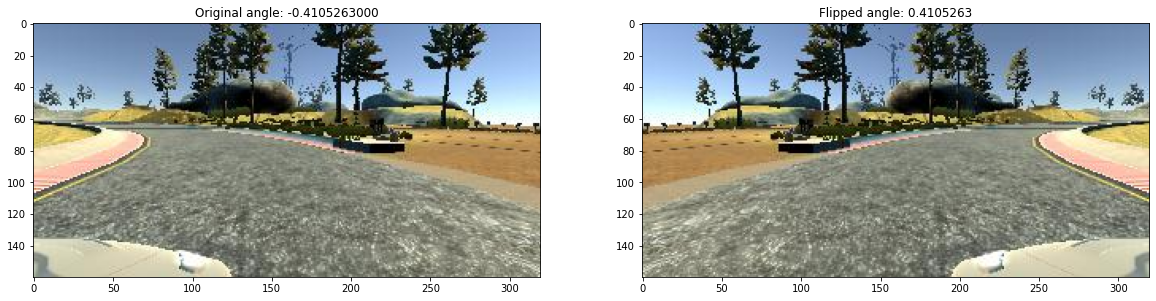

In [19]:
#Comparison of the original and the flipped image

original_image = read_image(X_train[20])
original_angle = y_train[20]

fliped_image, fliped_angle = flip_image(original_image, original_angle)

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Original angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
plt.imshow(fliped_image)
plt.title(f'Flipped angle: {fliped_angle}')

plt.show(block=True)

In [20]:
#Changing brigthness of image

def change_image_brightness(img, s_low=0.6, s_high=0.99):
    """
    Adjust brightness of the image.
    """
    img = img.astype(np.float32)
    s = np.random.uniform(s_low, s_high)
    img[:,:,:] *= s
    np.clip(img, 0, 255)
    return  img.astype(np.uint8)

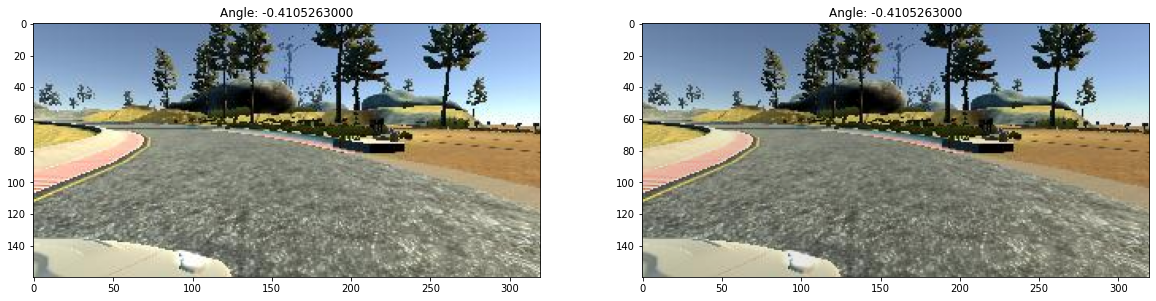

In [21]:
#Comparison of the original and image with changed brigthness

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
plt.imshow(change_image_brightness(read_image(X_train[20])))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
plt.show(block=True)

In [22]:
#Adding random shadow

def add_random_shadow(img, w_low=0.4, w_high=0.6):
    """
    Generates and adds random shadow.
    """
    cols, rows = (img.shape[0], img.shape[1])
    
    top_y = np.random.random_sample() * rows
    bottom_y = np.random.random_sample() * rows
    bottom_y_right = bottom_y + np.random.random_sample() * (rows - bottom_y)
    top_y_right = top_y + np.random.random_sample() * (rows - top_y)
    if np.random.random_sample() <= 0.5:
        bottom_y_right = bottom_y - np.random.random_sample() * (bottom_y)
        top_y_right = top_y - np.random.random_sample() * (top_y)
    
    poly = np.asarray([[ [top_y,0], [bottom_y, cols], [bottom_y_right, cols], [top_y_right,0]]], dtype=np.int32)
        
    mask_weight = np.random.uniform(w_low, w_high)
    origin_weight = 1 - mask_weight
    
    mask = np.copy(img).astype(np.int32)
    cv.fillPoly(mask, poly, (0, 0, 0))
    
    return cv.addWeighted(img.astype(np.int32), origin_weight, mask, mask_weight, 0).astype(np.uint8)

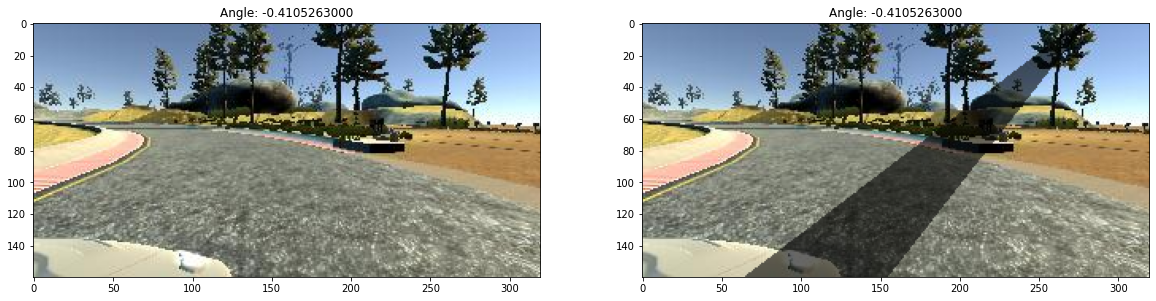

In [23]:
#Comparison of the original and image with added random shadow

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
plt.imshow(add_random_shadow(read_image(X_train[20])))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
plt.show(block=True)

In [24]:
#Adding random noise

def random_noise(image,prob=0.01):
    """
    Adds random noise to the image.
    """
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

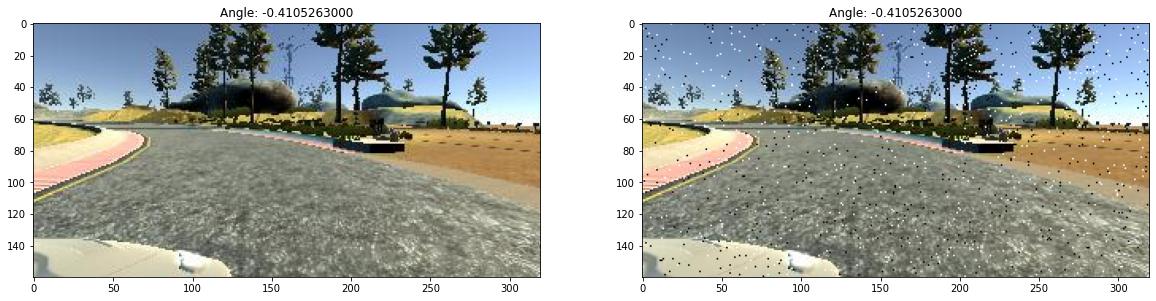

In [25]:
#Comparison of the original and image with added random noise

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
plt.imshow(random_noise(read_image(X_train[20])))
plt.title('Angle: {0:.10f}'.format(y_train[20]))
plt.show(block=True)

# **Generator**

In [26]:
def augment_image(img, angle, p=1.0):
    """
    Each supplied image goes through a series of augmentations, each occurring with a probability p (defined in the generator) between 0 and 1.
    """
    aug_img = img
    
    if np.random.random_sample() <= p: 
        aug_img, angle = flip_image(aug_img, angle)
     
    if np.random.random_sample() <= p:
        aug_img = change_image_brightness(aug_img)
    
    if np.random.random_sample() <= p: 
        aug_img = add_random_shadow(aug_img)

    if np.random.random_sample() <= p:
        aug_img = random_noise(aug_img)
            
    return aug_img, angle

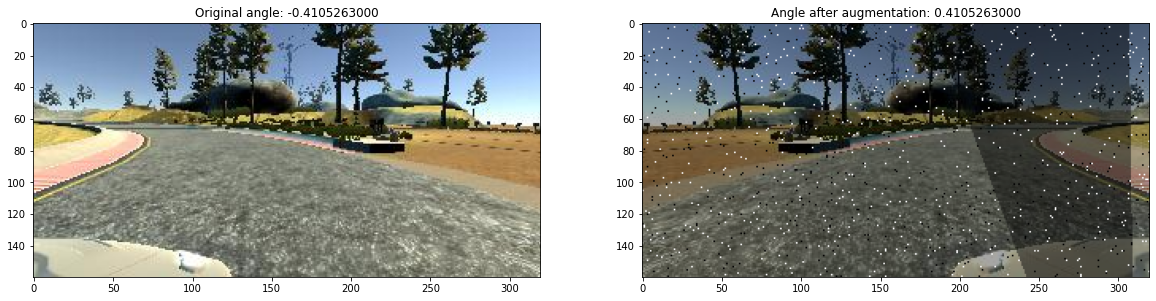

In [27]:
f = plt.figure()
f.set_figheight(15)
f.set_figwidth(20)
f.add_subplot(1,2, 1)
plt.imshow(read_image(X_train[20]))
plt.title('Original angle: {0:.10f}'.format(y_train[20]))
f.add_subplot(1,2, 2)
slika, agol = augment_image(read_image(X_train[20]),y_train[20])
plt.imshow(slika)
plt.title('Angle after augmentation: {0:.10f}'.format(agol))
plt.show(block=True)

In [28]:
def generator(inputs, targets, batch_size = 32, is_training=True):
    """
    Creating 'generator' function for memory efficiency.
    This function shuffles the dataset, crops images, randomly implements image agmentation function only on training dataset and normalize the images.
    """
    images = inputs
    while True:
      images, targets = sklearn.utils.shuffle(images, targets)
      for i in range(0, len(images), batch_size):
          X_batch = []
          target_batch  = []
          for image, target in zip(images[i:i+batch_size], targets[i:i+batch_size]):

              #Read, crop, resize and yuv color 
              slika = preproced_image(image)
              X_batch.append(normalize(slika))
              target_batch.append(target)
              slika_flipped, angle = flip_image(slika, target)
              fliped_image = normalize(slika_flipped)
              X_batch.append(fliped_image)
              target_batch.append(angle)
              
              if is_training:
                # Randomly implements augmention function on image.
                augmented_image, angle = augment_image(slika, target, p=0.5)
                slika = normalize(augmented_image)
                X_batch.append(slika)
                target_batch.append(angle)
                
          yield np.array(X_batch), np.array(target_batch)

In [29]:
train_generator = generator(X_train, y_train, 32)
valid_generator = generator(X_test, y_test, 32, is_training=False)

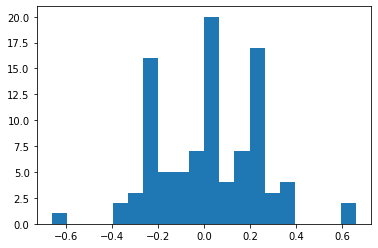

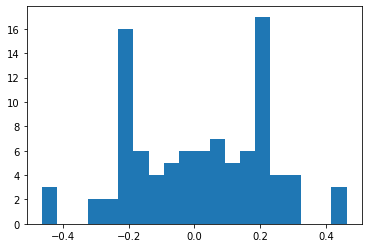

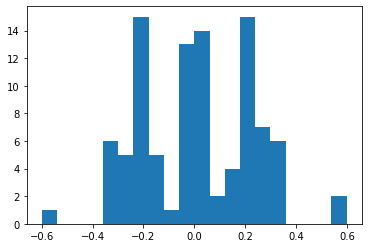

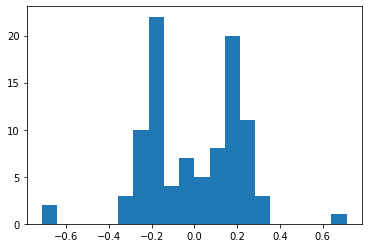

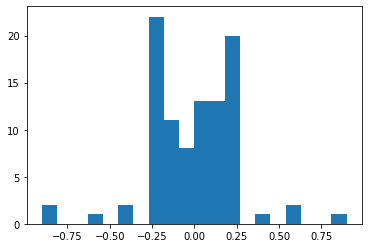

In [ ]:
#Visualzation of target per batch

for i in range(5):
   _, angle = next(train_generator)
   plt.hist(angle, bins = 20)
   plt.show()

# **Building Neural Networks**

##Model architecture, compile and callbacks

In [ ]:
model = Sequential()

# Input normalization layer
model.add(Convolution2D(24, (5, 5), strides = (2, 2), input_shape = (90, 320, 3), activation = 'elu'))

# 5x5 Convolutional layers with stride of 2x2
model.add(Convolution2D(24, (5, 5), strides=(2, 2), activation='elu'))
model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))

# 3x3 Convolutional layers with stride of 1x1
model.add(Convolution2D(64, (1, 1), strides=(1, 1), activation='elu'))
model.add(Convolution2D(128, (1, 1), strides=(1, 1), activation='elu'))

# Flatten before passing to Fully Connected layers
model.add(Flatten())

# Three fully connected layers
model.add(Dense(100, activation='elu'))
model.add(Dropout(.5))
model.add(Dense(50, activation='elu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='elu'))
model.add(Dropout(.5))

# Output layer with tanh activation 
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 77, 24)        14424     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 37, 36)         21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 17, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 17, 64)         3136      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 17, 128)        8320      
_________________________________________________________________
flatten (Flatten)            (None, 4352)              0

In [ ]:
adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer="adam", loss="mse")

In [ ]:
filepath = "model-{epoch:02d}.h5"

callback1 = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=False, mode='min', verbose=1)
callback2 = EarlyStopping(patience=10)
callback_list = [callback1, callback2]

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch = len(X_train)//32,
        validation_data = valid_generator,
        validation_steps = len(X_test)//32,
        callbacks = callback_list,
        epochs=50)

Epoch 1/50
540/540 [==============================] - 393s 647ms/step - loss: 0.5195 - val_loss: 0.0385

Epoch 00001: saving model to model-01.h5
Epoch 2/50
540/540 [==============================] - 351s 651ms/step - loss: 0.0466 - val_loss: 0.0362

Epoch 00002: saving model to model-02.h5
Epoch 3/50
540/540 [==============================] - 347s 644ms/step - loss: 0.0441 - val_loss: 0.0348

Epoch 00003: saving model to model-03.h5
Epoch 4/50
540/540 [==============================] - 346s 642ms/step - loss: 0.0394 - val_loss: 0.0337

Epoch 00004: saving model to model-04.h5
Epoch 5/50
540/540 [==============================] - 348s 646ms/step - loss: 0.0379 - val_loss: 0.0335

Epoch 00005: saving model to model-05.h5
Epoch 6/50
540/540 [==============================] - 350s 650ms/step - loss: 0.0384 - val_loss: 0.0332

Epoch 00006: saving model to model-06.h5
Epoch 7/50
540/540 [==============================] - 350s 648ms/step - loss: 0.0362 - val_loss: 0.0343

Epoch 00007: saving

##Preparating the X_train dataset for predictions

In [ ]:
def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = read_image(image)
    image = crop(image)
    image = yuv_color(image)
    image = normalize(image)

    return image

In [ ]:
# Converting the X_test dataset for predictions

X_test_ = np.array(list(map(preprocess, X_test)))

In [ ]:
model_prediction = model.predict(X_test_)

In [ ]:
model_prediction_ = model_prediction.reshape(1,-1)
model_prediction_.shape

(1, 4322)

In [ ]:
model_pred_abs = np.abs(y_test-model_prediction_) 

In [ ]:
threshold = 0.2

In [ ]:
is_accurate_model = np.where(model_pred_abs<threshold, 1, 0)

In [ ]:
accuracy_score_model = np.mean(is_accurate_model)

In [ ]:
print(accuracy_score_model)

0.8463674224895882


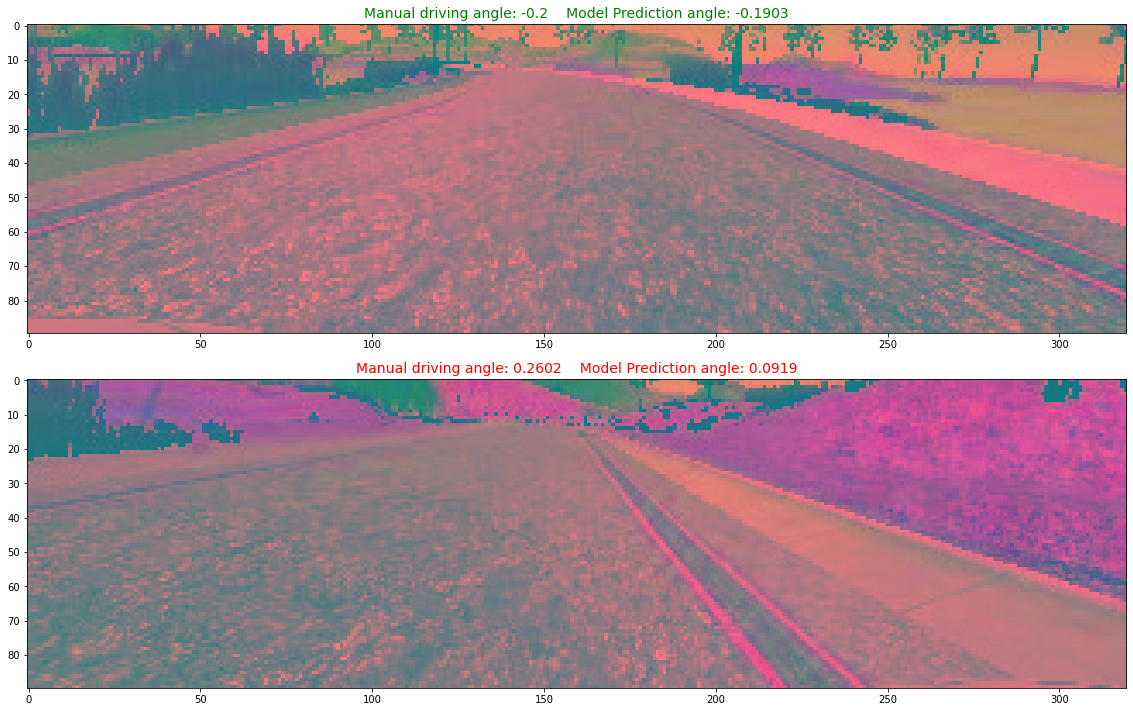

In [ ]:
# Correct prediction:
img_correct = X_test_[50]
actual_angle = round(y_test[50], 4)
predicted_angle = round(model_prediction[50][0], 4)

# Incorrect prediction:
img_incorrect = X_test_[1]
actual_angle_ = round(y_test[1], 4)
predicted_angle_ = round(model_prediction[1][0], 4)

fig, axes = plt.subplots(2, 1, figsize = (16, 10))
fig.tight_layout()

axes[0].imshow(img_correct)
axes[0].set_title('Manual driving angle: ' + str(actual_angle) + '    ' + \
          'Model Prediction angle: ' + str(predicted_angle), color = 'green', fontsize = 14)
axes[1].imshow(img_incorrect)
axes[1].set_title('Manual driving angle: ' + str(actual_angle_) + '    ' + \
          'Model Prediction angle: ' + str(predicted_angle_), color = 'red', fontsize = 14)
plt.show()